In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_absolute_error

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

Going to pipeline gridsearch more intepretable models, because we want to be able to tell what is causing cases of dengue rather than just predicting the number

Since the vegetation index is already weird and arcane, I'm going to make a predictive index from an NN from just the 4 pixels and then feed that + other features into a bunch of different models to see what works best

In [12]:
train_csv = "./data/cleaned_train.csv"
train = pd.read_csv(train_csv)

In [13]:
train.drop(labels=["Unnamed: 0", "week_start_date"], axis=1, inplace=True)

In [14]:
train = pd.get_dummies(train)

In [15]:
target = "total_cases"

y = train[target]

In [16]:
veggie_index = ["ndvi_ne", "ndvi_nw", "ndvi_se", "ndvi_sw"]
X_veg = train[veggie_index]

In [17]:
X_veg.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
0,0.122600,0.103725,0.198483,0.177617
1,0.169900,0.142175,0.162357,0.155486
2,0.032250,0.172967,0.157200,0.170843
3,0.128633,0.245067,0.227557,0.235886
4,0.196200,0.262200,0.251200,0.247340


In [18]:
# i'm not going to train test split this because its supposed to be added in later as a feature
ss_veg = StandardScaler()
X_veg = ss_veg.fit_transform(X_veg)

In [20]:
veggie_indexer = Sequential()

veggie_indexer.add(Dense(units=4,
                         activation="relu",
                         kernel_regularizer=regularizers.l2(.01),
                         input_dim=X_veg.shape[1]))
veggie_indexer.add(Dropout(.1))

veggie_indexer.add(Dense(units=16,
                         activation="relu",
                         kernel_regularizer=regularizers.l2(.01)))
veggie_indexer.add(Dropout(.1))

veggie_indexer.add(Dense(units=1,
                         activation=None,
                         kernel_regularizer=regularizers.l2(.01)))

veggie_indexer.compile(optimizer="adam", loss="mean_absolute_error")

veggie_indexer.fit(x=X_veg, y=y, epochs=500)

Epoch 1/500
1262/1262 [==============================] - 0s 386us/step - loss: 20.9330
Epoch 2/500
1262/1262 [==============================] - 0s 42us/step - loss: 20.5829
Epoch 3/500
1262/1262 [==============================] - 0s 45us/step - loss: 20.0981
Epoch 4/500
1262/1262 [==============================] - 0s 43us/step - loss: 19.3874
Epoch 5/500
1262/1262 [==============================] - 0s 39us/step - loss: 18.5285
Epoch 6/500
1262/1262 [==============================] - 0s 38us/step - loss: 17.7860
Epoch 7/500
1262/1262 [==============================] - 0s 45us/step - loss: 17.2679
Epoch 8/500
1262/1262 [==============================] - 0s 52us/step - loss: 16.7879
Epoch 9/500
1262/1262 [==============================] - 0s 45us/step - loss: 16.5606
Epoch 10/500
1262/1262 [==============================] - 0s 44us/step - loss: 16.4890
Epoch 11/500
1262/1262 [==============================] - 0s 40us/step - loss: 16.3214
Epoch 12/500
1262/1262 [===========================

1262/1262 [==============================] - 0s 35us/step - loss: 15.9129
Epoch 96/500
1262/1262 [==============================] - 0s 36us/step - loss: 15.8565
Epoch 97/500
1262/1262 [==============================] - 0s 32us/step - loss: 15.8811
Epoch 98/500
1262/1262 [==============================] - 0s 30us/step - loss: 15.8293
Epoch 99/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.8692
Epoch 100/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.8971
Epoch 101/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.8712
Epoch 102/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.8089
Epoch 103/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.8840
Epoch 104/500
1262/1262 [==============================] - 0s 29us/step - loss: 15.8638
Epoch 105/500
1262/1262 [==============================] - 0s 32us/step - loss: 15.8377
Epoch 106/500
1262/1262 [=========================

1262/1262 [==============================] - 0s 33us/step - loss: 15.8111
Epoch 189/500
1262/1262 [==============================] - 0s 32us/step - loss: 15.7410
Epoch 190/500
1262/1262 [==============================] - 0s 37us/step - loss: 15.6679
Epoch 191/500
1262/1262 [==============================] - 0s 40us/step - loss: 15.7511
Epoch 192/500
1262/1262 [==============================] - 0s 35us/step - loss: 15.9121
Epoch 193/500
1262/1262 [==============================] - 0s 64us/step - loss: 15.7476
Epoch 194/500
1262/1262 [==============================] - 0s 62us/step - loss: 15.7447
Epoch 195/500
1262/1262 [==============================] - 0s 49us/step - loss: 15.7734
Epoch 196/500
1262/1262 [==============================] - 0s 35us/step - loss: 15.7652
Epoch 197/500
1262/1262 [==============================] - 0s 32us/step - loss: 15.7906
Epoch 198/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.7886
Epoch 199/500
1262/1262 [=====================

1262/1262 [==============================] - 0s 32us/step - loss: 15.7481
Epoch 282/500
1262/1262 [==============================] - 0s 32us/step - loss: 15.7536
Epoch 283/500
1262/1262 [==============================] - 0s 38us/step - loss: 15.7757
Epoch 284/500
1262/1262 [==============================] - 0s 35us/step - loss: 15.6911
Epoch 285/500
1262/1262 [==============================] - 0s 36us/step - loss: 15.7604
Epoch 286/500
1262/1262 [==============================] - 0s 36us/step - loss: 15.7075
Epoch 287/500
1262/1262 [==============================] - 0s 36us/step - loss: 15.7463
Epoch 288/500
1262/1262 [==============================] - 0s 35us/step - loss: 15.7098
Epoch 289/500
1262/1262 [==============================] - 0s 33us/step - loss: 15.7188
Epoch 290/500
1262/1262 [==============================] - 0s 33us/step - loss: 15.7511
Epoch 291/500
1262/1262 [==============================] - 0s 31us/step - loss: 15.8093
Epoch 292/500
1262/1262 [=====================

1262/1262 [==============================] - 0s 35us/step - loss: 15.7417
Epoch 375/500
1262/1262 [==============================] - 0s 36us/step - loss: 15.7361
Epoch 376/500
1262/1262 [==============================] - 0s 33us/step - loss: 15.7081
Epoch 377/500
1262/1262 [==============================] - 0s 39us/step - loss: 15.7630
Epoch 378/500
1262/1262 [==============================] - 0s 35us/step - loss: 15.7456
Epoch 379/500
1262/1262 [==============================] - 0s 34us/step - loss: 15.7377
Epoch 380/500
1262/1262 [==============================] - 0s 37us/step - loss: 15.7938
Epoch 381/500
1262/1262 [==============================] - 0s 36us/step - loss: 15.7061
Epoch 382/500
1262/1262 [==============================] - 0s 39us/step - loss: 15.6949
Epoch 383/500
1262/1262 [==============================] - 0s 40us/step - loss: 15.6150
Epoch 384/500
1262/1262 [==============================] - 0s 46us/step - loss: 15.8105
Epoch 385/500
1262/1262 [=====================

1262/1262 [==============================] - 0s 48us/step - loss: 15.6989
Epoch 468/500
1262/1262 [==============================] - 0s 38us/step - loss: 15.7376
Epoch 469/500
1262/1262 [==============================] - 0s 35us/step - loss: 15.7005
Epoch 470/500
1262/1262 [==============================] - 0s 42us/step - loss: 15.7658
Epoch 471/500
1262/1262 [==============================] - 0s 38us/step - loss: 15.6557
Epoch 472/500
1262/1262 [==============================] - 0s 39us/step - loss: 15.7054
Epoch 473/500
1262/1262 [==============================] - 0s 37us/step - loss: 15.7810
Epoch 474/500
1262/1262 [==============================] - 0s 36us/step - loss: 15.7644
Epoch 475/500
1262/1262 [==============================] - 0s 33us/step - loss: 15.6876
Epoch 476/500
1262/1262 [==============================] - 0s 35us/step - loss: 15.7295
Epoch 477/500
1262/1262 [==============================] - 0s 37us/step - loss: 15.6789
Epoch 478/500
1262/1262 [=====================

In [21]:
v_index = veggie_indexer.predict(X_veg)

In [22]:
train.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_iq,city_sj
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0,1
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0,1
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0,1
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0,1
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0,1


In [23]:
train.drop(labels=veggie_index, axis=1, inplace=True)

In [24]:
train["vegitation_index"] = v_index

In [25]:
train.head()

,year,weekofyear,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,...,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,city_iq,city_sj,vegitation_index
0,1990,18,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,...,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,0,1,13.318899
1,1990,19,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,...,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,0,1,10.650167
2,1990,20,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,...,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,0,1,16.718319
3,1990,21,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,...,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,0,1,9.787750
4,1990,22,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,...,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,0,1,6.553177


In [26]:
features = [x for x in train.columns if x != target]
X = train[features]
y = train[target]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [28]:
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.transform(X_test)

In [29]:
# pipelining and gridsearch

In [ ]:

models  = {'rf': [RandomForestRegressor(), {'n_estimators' : [31,32,33,34,35], 'max_depth' : [18,19,20,21]}],
         'bag': [BaggingRegressor(), {'n_estimators' : [14,15,16,17]}],
         'ada': [AdaBoostRegressor(), {'n_estimators' : [45,50,55]}],
         'knn': [KNeighborsRegressor(), {'n_neighbors': [9,10,11]}],
         'lg': [LassoCV(), {'alphas': [np.linspace(1, 10, 1000)]}],
         'ridge' : [RidgeCV(), {"alphas": [np.logspace(0,5,200)]}]
            }

In [ ]:
for i, j in models.items():
    gs = GridSearchCV(j[0], j[1])
    gs.fit(Xs_train, y_train)
    y_pred = gs.predict(Xs_test)
    print(i, gs.best_params_, mean_absolute_error(y_test, y_pred))

In [30]:
rf = RandomForestRegressor(n_estimators=33, max_depth=20)
bg = BaggingRegressor(n_estimators=16)
knn = KNeighborsRegressor(n_neighbors=10)
lg = LassoCV(alphas=[np.linspace(1,10,1000)])

In [31]:
rf.fit(X_train, y_train)
bg.fit(X_train, y_train)
knn.fit(X_train, y_train)
lg.fit(X_train, y_train)

LassoCV(alphas=[array([ 1.     ,  1.00901, ...,  9.99099, 10.     ])],
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [41]:
X_train

,year,weekofyear,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_iq,city_sj,vegitation_index
774,2001,4,50.02,295.722857,296.671429,294.594286,301.8,292.3,88.03,94.057143,...,16.071429,5.628571,25.716667,9.433333,31.2,20.0,166.9,1,0,6.881246
741,2008,14,3.82,298.081429,298.228571,293.235714,299.8,296.5,3.67,74.600000,...,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5,0,1,19.697321
903,2003,30,2.64,296.485714,298.042857,291.850000,305.4,289.2,6.39,77.804286,...,13.558571,11.428571,26.466667,10.366667,32.1,18.0,9.9,1,0,5.624081
935,2004,10,52.08,297.981429,299.428571,296.455714,308.1,293.2,49.36,92.561429,...,18.094286,9.085714,28.400000,11.300000,34.5,22.3,79.0,1,0,7.283842
621,2005,21,156.94,299.805714,300.035714,296.900000,303.0,297.1,145.70,84.335714,...,18.485714,3.071429,28.385714,6.657143,35.0,23.9,71.2,0,1,18.841694
233,1996,3,55.68,297.752857,297.864286,294.551429,299.6,295.9,50.30,82.515714,...,15.917143,2.071429,25.971429,6.885714,31.1,21.7,40.6,0,1,17.474361
1205,2009,21,66.46,297.724286,299.521429,296.012857,307.1,293.4,39.89,91.790000,...,17.585714,10.071429,28.350000,11.450000,34.6,21.4,50.5,1,0,5.429327
963,2004,38,36.64,297.721429,299.064286,295.880000,308.9,293.3,59.50,91.200000,...,17.440000,8.928571,27.166667,9.500000,33.0,20.4,87.3,1,0,5.904281
1128,2007,48,129.33,297.880000,299.328571,297.217143,305.2,294.4,65.57,96.522857,...,18.924286,6.942857,27.125000,8.350000,32.3,22.4,293.1,1,0,10.452505
341,1998,37,72.73,300.147143,300.200000,297.160000,302.0,298.7,73.60,84.002857,...,18.724286,2.028571,28.328571,6.842857,32.2,24.4,61.3,0,1,17.109159


In [111]:
lg_coefs = lg.coef_
lr_df = pd.DataFrame((np.absolute(lg_coefs)))
lr_df.set_index(X_train.columns, inplace=True)

In [112]:
lr_df.head()

,0
year,1.173299
weekofyear,0.303452
precipitation_amt_mm,0.000000
reanalysis_air_temp_k,0.000000
reanalysis_avg_temp_k,0.000000


In [113]:
lr_df.rename({0:"alpha"}, axis=1, inplace=True)

In [114]:
lr_df.head()

,alpha
year,1.173299
weekofyear,0.303452
precipitation_amt_mm,0.000000
reanalysis_air_temp_k,0.000000
reanalysis_avg_temp_k,0.000000


In [124]:
lr_df.sort_values(by="alpha", ascending=False, inplace=True)
lr_df.head(6)

,alpha
year,1.173299
reanalysis_min_air_temp_k,1.050738
vegitation_index,0.773657
weekofyear,0.303452
reanalysis_precip_amt_kg_per_m2,0.043495
station_precip_mm,0.010288


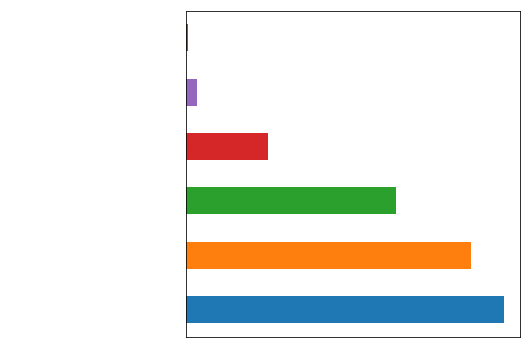

In [134]:
fig, ax = plt.subplots(figsize=(6,6))
lr_df.alpha.head(6).plot(kind="barh", ax=ax)
ax.tick_params(colors="white")

In [135]:
mae_df = pd.DataFrame()

In [136]:
mae_df["NN Features"] = ["poly-weather/cleaning 1", "poly-weather/cleaning 2", "no poly", "poly-weather/separate cities", "poly-weather/tuned", "no-poly/tuned/early", "poly/tuned/early", "no-poly/tuned2/early", "adjusted"]

In [138]:
mae_df["MAE Score"] = [29.6010, 29.1298, 30.3846, 30.7716, 28.0769, 31.2332, 29.8438, 29.7476, 30.5986]

In [151]:
mae_df

,NN Features,MAE Score
0,poly-weather/cleaning 1,29.6010
1,poly-weather/cleaning 2,29.1298
2,no poly,30.3846
3,poly-weather/separate cities,30.7716
4,poly-weather/tuned,28.0769
5,no-poly/tuned/early,31.2332
6,poly/tuned/early,29.8438
7,no-poly/tuned2/early,29.7476
8,adjusted,30.5986


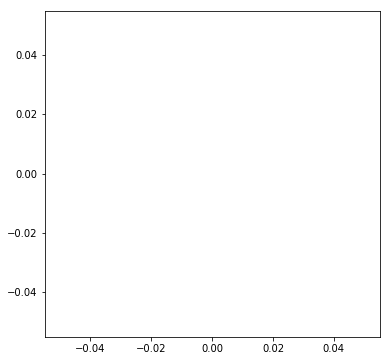

In [150]:
fig, ax = plt.subplots(figsize=(6,6))
mae_df.plot(kind="barh", ax=ax)
ax.tick_params(colors="white")
ax.scatter

#### prepping hold out

In [32]:
test = pd.read_csv("./data/test.csv")

In [33]:
test.drop(["Unnamed: 0", "week_start_date"], axis=1, inplace=True)

In [34]:
test_veg_X = test[veggie_index]

In [35]:
test_veg_preds = veggie_indexer.predict(test_veg_X)

In [36]:
test["vegitation_index"] = test_veg_preds
# i realize that I misspelled vegetation earlier but I dont want to go back and change it 

In [37]:
test = pd.get_dummies(test)

In [ ]:
test.drop(labels=veggie_index, axis=1, inplace=True)

In [ ]:
rf_preds = rf.predict(test)
bg_preds = bg.predict(test)
knn_preds = knn.predict(test)
lg_preds = lg.predict(test)

In [ ]:
rf_preds = rf_preds.astype(int)
bg_preds = bg_preds.astype(int)
knn_preds = knn_preds.astype(int)
lg_preds = lg_preds.astype(int)

In [ ]:
sub = pd.read_csv("./data/submission_format.csv")

In [ ]:
rf_csv = sub.copy()
bg_csv = sub.copy()
knn_csv = sub.copy()
lg_csv = sub.copy()

In [ ]:
rf_csv["total_cases"] = rf_preds
bg_csv["total_cases"] = bg_preds
knn_csv["total_cases"] = knn_preds
lg_csv["total_cases"] = lg_preds

In [10]:
rf_csv.to_csv("./submissions/rf_preds.csv", index=False)
bg_csv.to_csv("./submissions/bg_preds.csv", index=False)
knn_csv.to_csv("./submissions/knn_preds.csv", index=False)
lg_csv.to_csv("./submissions/lg_preds.csv", index=False)

NameError: name 'rf_csv' is not defined

In [ ]:
# The best was the random forest, MAE of 26.1, which makes it the best overall too
# knn was 30.2
# lasso was 34.3 